In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# for frequency distributions
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
%cd "C:\Users\eric_\OneDrive\Desktop\my_project\Clustering LC Data"
data = pd.read_csv("PMLendingClub.csv")


C:\Users\eric_\OneDrive\Desktop\my_project\Clustering LC Data


In [9]:
data.shape

(1048575, 44)

In [3]:
data['int_rate'] = data['int_rate'].str[:-1].astype('float64')
data.head()
data['term'] = data['term'].str[:-6].astype('float64')
data.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,...,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,year
0,0,NaN,10000,10000,36.0,9.67,321.13,B,Registered Nurse,7 years,...,3.0,4349.0,973.0,89.4,77.3,66.7,58486.0,39143.0,9200.0,2013
1,1,NaN,20800,20800,36.0,13.53,706.16,B,Operations Manager,10+ years,...,9.0,869.0,6811.0,54.6,90.2,50.0,43100.0,23473.0,15000.0,2013
2,2,NaN,8000,8000,36.0,10.99,261.88,B,PARTS MANAGER,2 years,...,2.0,1772.0,2255.0,72.5,100.0,75.0,33226.0,15949.0,8200.0,2013
3,3,NaN,28000,28000,36.0,7.62,872.52,A,Area Sales Manager,5 years,...,6.0,53306.0,13901.0,67.1,100.0,16.7,850886.0,199739.0,42200.0,2013
4,4,NaN,11500,11500,60.0,22.90,323.54,E,Secretary,4 years,...,9.0,2060.0,2689.0,70.1,100.0,50.0,30891.0,24724.0,9000.0,2013


In [4]:
# # Descriptives of all variables in the dataset
desc = data.describe(include = "all").T
desc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1.04858e+06,NaN,NaN,NaN,524287,302698,0,262144,524287,786430,1.04857e+06
id,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,1.04858e+06,NaN,NaN,NaN,15002.8,8531.24,1000,8300,13500,20000,40000
funded_amnt,1.04858e+06,NaN,NaN,NaN,15002.3,8530.91,1000,8300,13475,20000,40000
term,1.04858e+06,NaN,NaN,NaN,43.0834,10.9466,36,36,36,60,60
int_rate,1.04858e+06,NaN,NaN,NaN,13.1426,4.50343,5.32,9.75,12.88,15.99,30.99
installment,1.04858e+06,NaN,NaN,NaN,444.715,248.546,4.93,264.1,388.06,583.55,1569.11
grade,1048575,7,B,304580,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,986436,315531,Teacher,17396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,991605,11,10+ years,352408,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Choosing the list of numeric variables only

missing = sum(data.isnull().values)
len(missing)
cols = list(data)
missing
df = pd.DataFrame()
df["cols"] = cols
df["missing"] = missing


# # # List of possible numeric columns to keep
desc = data.describe(include = "all").T
desc
listofcols = desc[desc.iloc[:,[2]].isna().any(axis=1)].index
for i,j in enumerate(listofcols):
    print(i,j)

# List of numerical variables to keep    
tokeep = listofcols[[2,3,7,8,9,12,13,14,15,22,23,24,25,26,27,28,29,30,31,32]]

0 Unnamed: 0
1 id
2 loan_amnt
3 funded_amnt
4 term
5 int_rate
6 installment
7 annual_inc
8 dti
9 inq_last_6mths
10 mths_since_last_delinq
11 mths_since_last_record
12 open_acc
13 pub_rec
14 revol_bal
15 total_acc
16 total_pymnt
17 total_pymnt_inv
18 total_rec_int
19 total_rec_late_fee
20 last_pymnt_amnt
21 tot_cur_bal
22 total_rev_hi_lim
23 acc_open_past_24mths
24 avg_cur_bal
25 bc_open_to_buy
26 bc_util
27 pct_tl_nvr_dlq
28 percent_bc_gt_75
29 tot_hi_cred_lim
30 total_bal_ex_mort
31 total_bc_limit
32 year


In [6]:
# Subset of 2017 data with only numerical non missing data

dataNum = data[tokeep]
print(dataNum.shape)

# Deleting NAs from the numerical columns
dataNoNA  = dataNum.dropna()
print(dataNoNA.tail())
dataNoNA.shape

(1048575, 20)
         loan_amnt  funded_amnt  annual_inc    dti  inq_last_6mths  open_acc  \
1048570      19200        19200     57000.0  22.83             1.0        16   
1048571       7000         7000     50000.0   4.37             1.0         7   
1048572      30000        30000    150000.0  25.30             0.0        16   
1048573       5000         5000     36600.0   7.31             3.0         8   
1048574      15000        15000     50000.0  24.12             0.0         9   

         pub_rec  revol_bal  total_acc  total_rev_hi_lim  \
1048570        1       8404         32           27500.0   
1048571        0       5261          9           14000.0   
1048572        0      17489         42           39700.0   
1048573        1       1968         18           24100.0   
1048574        0       6838         26            9800.0   

         acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  bc_util  \
1048570                   7.0       1454.0          8105.0     45.2   
10

(1010078, 20)

In [7]:
# EllipticEnvelope uses Mahalanobis distance 
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

outlier_frac = 0.01 #Fraction of outiers

ell = EllipticEnvelope(contamination=outlier_frac)
iso = IsolationForest(contamination=outlier_frac)
lof = LocalOutlierFactor(contamination=outlier_frac)
ell.fit(dataNoNA)
iso.fit(dataNoNA)
pred1 = ell.predict(dataNoNA)
pred2 = iso.predict(dataNoNA)
pred3 = lof.fit_predict(dataNoNA)
pred = pred1 + pred2 + pred3
pred

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.282991206786619 > 131.905821344475157). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.646751242590341 > 130.214288166870830). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (127.157710793966586 > 126.741346984704407). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.209003966319784 > 129.973561253504613). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.476731402632907 > 128.589808337914718). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.679209010316043 > 129.658379613844886). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.628208803217490 > 132.134544836012424). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.876038605599888 > 129.901580724355739). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.210891049245902 > 130.867319133028218). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.339776563362278 > 131.840732088170398). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.925852443682317 > 129.242334892448753). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.388512370972762 > 132.696133820514575). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.120369658662895 > 130.890839539327175). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.361518788534511 > 130.184646143223063). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.052720423666017 > 127.917128963207091). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.408543913931510 > 127.535149500298317). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.500082675262888 > 131.348383501438605). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.791873419154541 > 129.767994313188041). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.081147720562427 > 129.550331889748321). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.707377319622339 > 129.359086919756891). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.086465194467081 > 128.355402059028535). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.819336987085592 > 128.317638939462199). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.204035678910913 > 129.390743811172314). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.030586896942935 > 129.441860523132902). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.983987246243913 > 129.734057693679830). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.669714840450865 > 129.455808487661756). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (128.747849302681573 > 128.080910508819272). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.017834252950735 > 131.965704386329946). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.745766373731840 > 129.354507490568921). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.876770319442301 > 127.915706287282319). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (128.963861251179765 > 128.188391725461344). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.370914459866668 > 129.415457139943896). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.790456973025726 > 127.625339163395168). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.010678220631462 > 128.923212484668255). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.954667357529530 > 129.838043910133763). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (128.977833933257045 > 128.272334276616760). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.233363777139346 > 130.992733827311781). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.437663550869360 > 129.387046790823376). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.243659674920167 > 128.314329279411282). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.900830035368301 > 129.664743976309978). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.549619341343686 > 128.274149426688467). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.929798059056736 > 131.663053997059649). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.284177239299197 > 128.498683236270551). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.646344163214451 > 129.601111058716896). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.339924211229828 > 129.062368886107606). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.789696137805208 > 129.252302077871974). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.386155027396654 > 126.128240084834204). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.527431624340124 > 129.582185950633601). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.110084149694842 > 128.299818594800882). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.936685640686960 > 130.745324101122009). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.888841626487419 > 131.460503152793166). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.439860161977549 > 131.644843263510069). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.131985431401517 > 131.501823666358320). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.346927012658881 > 131.050071257438020). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.536471790981977 > 129.771341870144170). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.418512437403194 > 130.914056212121778). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.417846180668789 > 130.977932528088047). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (127.969236408217313 > 124.388698998456832). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (128.716835273873841 > 125.658871647436683). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.299569357096146 > 128.383172805815832). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.897901762411635 > 129.188163324430690). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.669093269465549 > 130.559735309526445). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.270102786367914 > 130.604811297163479). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.788592139567953 > 127.413438236785140). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.538102132032208 > 128.480541964084182). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.308062250475700 > 131.737011789433666). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.715284298375536 > 129.926873616667535). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.865761759727860 > 128.538072983814118). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (128.908455848448227 > 128.877375943144983). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.089830326654635 > 131.923235226479136). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.722319291928073 > 129.625994553334067). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.962082838425829 > 128.985508667058667). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.949012824245841 > 130.906698643472737). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.648285976364093 > 128.894941018417711). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.856283320123936 > 128.686903462144727). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.340650843876688 > 128.095091159658125). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.457428167004480 > 127.076443521731036). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (127.939169558396443 > 125.835272049688626). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.787698521910215 > 130.838723662875111). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.544569497259346 > 130.440115898005047). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.172861432472644 > 131.697152105647689). You may want to try with a higher value of support_fraction (current value: 0.503).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.480337328002946 > 131.001338272160211). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.496632379477745 > 129.721111256743171). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.231042729625585 > 129.867848057116134). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.519528751031885 > 129.727832403971803). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.802979596398529 > 129.610110374632683). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.080295383856111 > 128.094283309012837). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.247467831428594 > 129.372623689733985). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.629113915023424 > 130.079460085781363). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.642392773266522 > 128.602723395054767). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.560475658564968 > 129.617755868853436). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.718564884679807 > 128.408554726450603). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.487953293109427 > 130.692543095089832). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.139311190660692 > 127.616959499130203). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.809951430068480 > 129.737273085632523). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.646491829381290 > 130.630109846806732). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.959630806111647 > 129.331291730801127). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.585223517922202 > 130.098016596480676). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.757269311789884 > 128.482006786839975). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.514477074535222 > 129.279466739725081). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.687805075905885 > 129.239558095145753). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.940611494696952 > 130.242715826683792). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.970369668973262 > 132.905067476569968). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.534149846757145 > 128.248922545670098). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.626347130985238 > 130.889782230532717). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.996603646105257 > 128.614930853679056). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.388391528185878 > 128.823985839165346). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.393664041417338 > 130.981908131765834). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.020116640565789 > 129.074999735320603). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.802842106294946 > 129.471678739845686). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.522000622328164 > 129.785357738386494). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.575208647343288 > 129.677734237154084). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.218668937021306 > 126.855322323378601). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.752671736073921 > 130.056816037483600). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.655941447108546 > 130.732722242303026). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.315937930948053 > 130.901294275499623). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.867643043333601 > 129.951247051824055). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.683597141256740 > 129.732088871176444). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.362807848706098 > 129.466270858990327). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.092080358419594 > 126.461271014956225). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.139472772429087 > 126.404573888066025). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.288679921629381 > 127.320537481126678). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.342421941048883 > 130.351505735071413). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.272446436780712 > 127.801367585395383). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.813879351466511 > 128.354302439040566). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.756493530908443 > 131.814199643176210). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.563328550533242 > 130.157236362804724). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.088074936742089 > 128.784988367284797). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.094313502845381 > 130.110266584160229). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.184870942054886 > 131.527712249115808). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.322447451265816 > 128.680752470838257). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.045258013411967 > 126.094627838855729). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.747305269621563 > 130.799992961721216). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.863014678485285 > 127.885289559320228). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.037954786643297 > 131.831175117119642). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.997534391216476 > 130.411503685880916). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.709083328843889 > 129.946560758143590). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.565173270306076 > 127.183627698694480). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.176312762628982 > 131.646528363170404). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.984664615447116 > 129.981278919411579). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.336599644434784 > 130.666895501664840). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.386395996103317 > 128.262825948443236). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.146025624815991 > 131.549991889518310). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.593985266209046 > 129.764002392222636). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.567034024616532 > 128.839984390743638). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.255253277081977 > 128.428799244666493). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.714253720490348 > 131.967047562061794). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.116621757981818 > 128.893768142944197). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.101384696490129 > 128.535678243092377). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.480880899401939 > 129.839355268554897). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.255830409316104 > 129.413817752513580). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.650918374815262 > 129.786470548655672). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.370636850847973 > 129.893034518133277). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.172738477171663 > 130.388496799957494). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.964616690032670 > 130.525061691224096). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.882480382428611 > 128.073912304140720). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.665703660633255 > 126.736797833542880). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.159517207829367 > 132.510057331886429). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.588888449691069 > 130.203210015234959). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.091003619612195 > 129.928984413661340). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.342041433012128 > 129.636354417336179). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.848755869452532 > 119.550202615833854). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.338548525654744 > 127.832807331657961). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.040018775642693 > 128.215441176196322). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.921724364346403 > 129.859615420082378). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.959078585510611 > 129.802508075502828). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.275530433540496 > 126.103722982606655). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.256098158528943 > 130.183034565171369). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.537871271081400 > 127.787301481342496). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.456283780306364 > 128.222562138227232). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.092793817678142 > 129.122059227104415). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.485889860582517 > 129.006501572269855). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.676291497825218 > 129.233473447780085). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.880632683340281 > 130.941647845457595). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.824731681377187 > 130.164957067015564). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.837308220221104 > 130.292552481447615). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.907749153903865 > 128.310451392890030). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.036660389637518 > 130.543113909186957). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.821444479555055 > 127.331646012320505). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.294137830943441 > 130.987173709671282). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.597836020238674 > 130.628299526216466). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.919235275582423 > 130.604647368022995). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.976167436670380 > 130.030485203556651). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.536656984023750 > 129.736166661046497). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.586719907298857 > 127.300717917646281). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.173623354432664 > 129.700392773441394). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.040082056390617 > 129.414258047105506). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.254219783287709 > 127.013961899286471). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.094915499759594 > 131.435835474609775). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.440032741891798 > 131.486143657466698). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.414879334515035 > 129.598150201516034). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.189905927462490 > 128.741377047018915). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (128.298611521092141 > 126.362896775899401). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.151962669974182 > 128.414281460820263). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.316175150628283 > 131.711732024146471). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.125859121230974 > 129.801606462166916). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.581361619183212 > 128.487925977165247). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.920035014039001 > 130.348945845085154). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.929090398171468 > 131.145918849321788). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.515777500480823 > 127.782096428374729). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.823672549053668 > 130.132218947273856). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.397302669675412 > 128.753751276775802). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.133176905621895 > 130.494311004490044). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.745490329666069 > 131.171133463617991). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.287510573049474 > 130.571052482565420). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.322968324506036 > 129.768814137891269). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.489941608554886 > 130.386330602119216). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.181761754588706 > 129.450833708805391). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.874918793591206 > 130.502319337211645). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.730770413203174 > 130.432827797218948). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.840557135380379 > 132.174597155786046). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.131875125333522 > 133.149660091285938). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.136456862871313 > 131.184254666877536). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.132836033848065 > 130.999167606888022). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.454007967462417 > 129.173460372399546). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.273425295312791 > 128.816797857373786). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.828933359161340 > 132.526691013104198). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.234738882963569 > 128.835972954213844). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.205422027895196 > 128.037400225145063). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.283348641609336 > 129.934225507598939). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.233113441609277 > 129.707953507322884). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.711947956989093 > 129.441293346027066). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.186223910186357 > 128.760467593442968). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.932402947922441 > 128.668041729987635). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.873404045112636 > 129.275775045831097). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.695256183272534 > 129.871980097301190). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.254319898504065 > 128.462105245600128). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.117275875605770 > 128.476755577103575). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.597872985862267 > 133.217563019107388). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.035888568254734 > 128.988204502157004). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.444496596680779 > 130.175610376774358). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.174060992962978 > 130.850268088617327). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.951032564201881 > 132.202397417223551). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.982671096600683 > 131.752163061042211). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.662520074658943 > 129.432571731977532). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.378458134094672 > 127.814737339700088). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.598455905308583 > 132.708606247722059). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.008469824866125 > 128.940061444636541). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.478088141369511 > 124.854404046845289). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.046268305090962 > 128.760902011830638). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.116919083466485 > 131.020046645110511). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.899357132285246 > 128.897309101019715). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.418185815981985 > 127.524680347524111). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.733273372286192 > 129.146910704121979). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.988398139450368 > 128.434936200061941). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.696745407668772 > 125.701912763676205). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.745622950438332 > 131.486487119038372). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.461745909380312 > 131.103604379037563). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.313098694228870 > 131.268403547769509). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.248216806110918 > 130.413038677534246). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.488012464290080 > 129.702474497479301). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.711437310039429 > 130.317413813581396). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.997268640325984 > 130.380946647664103). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.763347479924761 > 128.897264333799512). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.526069524870394 > 129.655088740094214). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.902562016649995 > 129.343972750051762). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.232995278284818 > 130.446081169782815). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.180778307409184 > 129.965350844565393). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.174235235289188 > 127.481523557103145). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.982108421010025 > 130.709747928479260). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.291585717887074 > 132.016213046182600). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.190936956191592 > 130.625714567895727). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.869280693190234 > 129.364399793723521). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.248953965535179 > 129.829314314184671). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.637342733639002 > 129.659896874981541). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.364709785285271 > 131.575190057364068). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.973251121045479 > 130.511278153370171). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.311098666122206 > 127.557854605051219). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.510440776213727 > 129.666523230067469). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.758992103463413 > 128.053465885885458). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.762817050510989 > 129.295388944585710). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.421633501077281 > 130.185299491350548). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.058914732006514 > 130.315330434643386). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.111109975440769 > 128.068066192086349). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.511332156172273 > 129.136864702340233). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.657268127890916 > 129.067197216104603). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.700628158770854 > 129.183618261152105). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.615761647118291 > 128.057513335237218). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.679386329076294 > 130.556993165175498). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.954326245502443 > 130.058781183185772). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.615382784980596 > 129.893089916456688). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.223207727599714 > 130.452668780290253). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.253110998879464 > 128.448420088555451). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.659751460768433 > 130.381586344568120). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.339245092977990 > 129.112834727752329). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.932841956378212 > 129.371784390762343). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.974217113582256 > 131.030551995286572). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.557586944622074 > 128.276504528874113). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.838212648360212 > 128.742178377727299). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.674266295580765 > 128.806181022681358). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.139296306735929 > 130.566307918160987). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.415220135749792 > 129.210621385236152). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.627771783903682 > 127.612793641381700). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.394177245275500 > 126.734928794384899). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.591771218554697 > 128.044832219819881). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.855242935142854 > 127.457461974869787). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.236592653595096 > 129.330213970880578). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.576693261138701 > 128.779990760346237). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.107334704746620 > 128.699857344844162). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.351226054321643 > 129.502199174319486). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.656711330021096 > 129.625984328086105). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.253448673477806 > 129.318167749475350). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.958435087606119 > 127.185337994567988). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.069330853256758 > 128.563879007851142). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.330103553601930 > 128.844168685767102). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.755128731699727 > 130.008592917826292). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.709208106566535 > 126.580266658622776). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.742296766147746 > 130.312170380725320). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.734405695914376 > 129.893414261673882). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.795832594884871 > 130.646688324121982). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.260766987398881 > 130.148754769822517). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.545614132762921 > 129.618778114096614). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.079495676567348 > 130.456498133716281). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.848017655434120 > 130.260114415959521). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.638731581124574 > 131.534084253724160). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.486508029665174 > 127.456911601319234). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.238710820339406 > 129.074082650333992). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.059942619244907 > 129.300837690418803). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.929789225730786 > 130.605566123157359). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.988477964111354 > 128.341239322367386). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.756878650169455 > 128.778927287858494). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.241375558739264 > 128.284630429668539). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.281490016453972 > 130.114546374281900). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.338247633835181 > 129.947128269091593). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.569284995444377 > 130.820963829134769). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.704443626128494 > 128.321649284562000). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.098366362393108 > 131.903929269595324). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.486832261687397 > 130.125427035962105). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.106633859956844 > 129.551398126163690). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.188702198714083 > 128.805170042842605). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.118374422271444 > 129.082976801059232). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.381367869948804 > 130.308265833320519). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.789949642452967 > 130.871281476563240). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.391124260858106 > 131.465898126033892). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.663147977383915 > 130.739644106664485). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.295751552904960 > 128.865859985836551). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.111616389899183 > 128.555601713762002). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.624659914400326 > 130.283320541744558). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.204300559985256 > 129.408816676357873). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.273254667156465 > 128.060430339045070). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.306235853683063 > 132.004740379726059). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.808088588159023 > 129.798667793301576). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.486439265768922 > 125.666092430129638). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.088934164216226 > 126.977059080959265). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.570259490800254 > 129.548724058868487). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.823753959591500 > 128.168729135070834). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.450196736310403 > 129.831260025024250). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.925630157329238 > 129.007210875084866). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.969163049802148 > 128.670302415614572). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.287569876925545 > 130.151372996378058). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.618646276542563 > 130.095209987621701). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.577315825740897 > 130.256990407454850). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.905369920042119 > 128.343673333725235). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.312950073753342 > 129.300197891242789). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.922351988411890 > 127.543471246829668). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.476255171237369 > 130.144879308543381). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.847838016006733 > 130.530646201482170). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.813809577293028 > 127.265345119596731). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.161380981095647 > 129.756620789461607). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.442696494529059 > 129.193998188787134). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.680383701789083 > 128.916872929735518). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.884480825644573 > 128.979629335933993). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.751894467356578 > 130.385356521743461). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.572946790145807 > 130.529816702347205). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.473731317258910 > 132.518382018552160). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.171672728019558 > 129.600680446060380). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.350399176147732 > 131.335875068208111). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.777251083246114 > 130.414420569836608). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.920972260747760 > 130.616400958243304). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.217970122578862 > 131.025696472797932). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.468653449380980 > 128.565542387472391). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.207199249691286 > 130.921508667677159). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.056020159049211 > 126.519515519360183). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.210798655148551 > 127.808036167557816). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.860984508600239 > 128.665240270182892). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.883795856033146 > 127.958270694779543). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.917071576777488 > 132.596638697029647). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.638436378179080 > 131.574384439205005). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.403193011272805 > 129.357137132848379). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.752512579051597 > 130.540277141007209). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.440578828330217 > 131.263857046882265). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.233067503763863 > 129.491704857611211). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.274991013270665 > 127.327216760718017). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.416212455225946 > 129.719711297172552). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.449910974214674 > 129.517564691967948). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.975264135139525 > 128.267481864421711). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.770976009563782 > 128.835768000206343). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.324320550399676 > 126.159940271595374). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.404329168683631 > 131.109031576138818). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.598850561730217 > 131.055597260567254). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.746927725330323 > 129.878406087608795). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.461045860866648 > 130.591802202970058). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.612890806949281 > 130.770645636206552). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.326875379321535 > 131.099313540863363). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.484846664472514 > 130.047998897677104). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.075211657725333 > 130.341113664686134). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.935986868491000 > 128.577455198697436). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.363674689676998 > 129.044502414129909). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.586187838107861 > 128.446766681924345). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.076639572102351 > 131.193151081976907). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.261000132803986 > 129.830908729057967). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.843891790221875 > 129.888828083768487). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.517466548314161 > 129.708299185684382). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.975381141721073 > 131.597196812883453). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.596905379481456 > 129.672663037204700). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.825825628984120 > 129.561368674463210). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.099499140991242 > 131.493594374781708). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.341037222026671 > 129.562084408529699). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.010062775069031 > 129.153081741489814). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.137687035629682 > 129.647507960029003). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.315357916194387 > 128.508276160975612). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.827516445179725 > 130.912236978738719). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (128.463531040306009 > 128.095767049350627). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.009846444472601 > 128.599047368626543). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.963631124198827 > 131.012215647046332). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.476022440223545 > 129.875980678690780). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.407059121831765 > 130.834535805708754). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.540447126203048 > 124.844041400698487). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.855290161416491 > 130.797187844863572). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.890543691732773 > 129.707543611327139). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.343515968454454 > 128.851762875301972). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.817748836843492 > 130.492430064307598). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.217186198691309 > 130.497084885494360). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.801478757994971 > 129.071885360495429). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.785681890788567 > 130.944532211511813). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.830051117869203 > 127.843204822835744). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.971126917952063 > 129.294120455351987). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.994910746540540 > 130.313204729949177). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.609447636100015 > 130.463069751024875). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.324866661625748 > 127.803075413468477). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.723694652374320 > 130.902925565775973). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.596755514678904 > 128.130164776463459). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.756045683471029 > 130.101123114705246). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.680742803983122 > 130.849494632551625). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.637756273554771 > 129.556206039351792). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.487097844749229 > 131.063148953274123). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.410666296879810 > 129.165285789253119). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.274280091587400 > 130.491201960504384). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.093180271242431 > 128.293720704176451). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.940714814032049 > 128.442362362029542). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.433705468683399 > 130.776378568661926). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.203003401123880 > 127.349068134458207). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.498158118499873 > 130.221090882417457). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.121302639132125 > 129.988754211516635). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.612974869086571 > 131.538443493072066). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.424379796169518 > 132.041627597594527). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.605539229529086 > 130.054119721989849). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.897067684240767 > 127.119455664705526). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.929235099315946 > 124.273058217704758). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.569989581835955 > 129.904351597922926). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.007728747421027 > 128.835567406693229). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.267397498233805 > 130.925240402572513). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.695526047437028 > 128.753478434263684). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.213199591294057 > 129.432980966221521). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.140470785894678 > 129.016984640864621). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.750613185284578 > 131.238526070403850). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.079081915875463 > 131.758409881583333). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.288140976274093 > 129.355010850997360). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.546781314224546 > 128.716120763155573). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.236292225379685 > 130.849611175007425). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.641684657876738 > 131.461151168644989). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.018966129645037 > 130.310366983450564). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.641103036057928 > 128.356105234722293). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.865119998558043 > 128.985875474097838). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.392329138147687 > 129.172511635081662). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.962657250125176 > 129.988520598242644). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.906411062327749 > 128.958263335962471). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.895473010491742 > 125.336821803991342). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.805725246264188 > 129.804768028708423). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.767588237814977 > 129.992311140572411). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.497427924035662 > 131.378724234625281). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.086905614997079 > 130.958672843244955). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.071077392000120 > 130.279833273071489). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.661027412595786 > 128.446271852284298). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.036932132812126 > 129.642057953595668). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.490271351903601 > 129.568778410137497). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.607435133348389 > 129.647557103311129). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.757529618278141 > 131.269781930695473). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.956044911373368 > 130.033077592732695). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.781055851148835 > 129.735252285287544). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.304969299694449 > 131.884452686129833). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.542513323582455 > 129.298198645657294). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.958432660555758 > 132.675575179839797). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.556874215409351 > 127.673734416925356). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.760650463355489 > 128.214260738057988). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.426270899156492 > 128.547084076987659). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.441967344108377 > 127.503100880204215). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.954626367283737 > 130.993663222197426). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.785043691731204 > 125.192939879611430). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.601808537662578 > 131.470413075897142). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.237549364903515 > 130.279141611335490). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.653748833101844 > 127.475363536093369). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.466835240905567 > 130.070336057841303). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.644033044263949 > 129.073144249625244). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.369213096121968 > 130.798257738051149). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.521268154129018 > 129.180106481172771). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.876511251783768 > 131.248683537209075). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.588188809052269 > 131.411057548014298). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.967134277700325 > 129.303170198507871). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.376060395043282 > 129.309551019404125). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.248712562658739 > 127.891594010469021). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.642355125744928 > 130.456325325667819). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.144575835995113 > 128.650228089146196). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.705879295798979 > 130.948239891999521). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.810133137031016 > 129.055269114713667). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.067764118900897 > 132.736162605136798). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.695111505858989 > 126.502859789096021). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.636867897756986 > 129.200255150367269). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.303058023588079 > 130.454979951441260). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.252354489011935 > 132.817110397075567). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (130.799116179428580 > 129.973592387249795). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.349837595711307 > 129.944343794658835). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.053747458558007 > 130.947419295930587). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.603363538405574 > 129.106821384201993). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.944139236918261 > 128.273076711001039). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (135.041103428109807 > 133.226570528577099). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.821558054843536 > 127.618198183781431). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (129.208565584558272 > 129.048843163345651). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.602046657187515 > 128.391347821511317). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.157763499121074 > 129.956981542201987). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.320961261903477 > 128.560223612820977). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.454890720072513 > 129.597010622641051). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.968793221950023 > 130.247076205466584). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.792821997890314 > 129.185779869080136). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.997020983578579 > 129.217340123364778). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.546793021669174 > 130.382799424716779). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.387135290272084 > 129.877539099256921). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.143546078312426 > 130.640422292212492). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.813610791738398 > 131.321362530306914). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.934697691303683 > 128.589399173302894). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.267212855965084 > 130.252209654514104). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.214847660852087 > 130.043478933089517). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.390905263838079 > 126.423577277027675). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.359658914551574 > 127.554613007561585). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.721957217100339 > 127.857812451889757). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.595655648675319 > 130.605854741762101). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.384919436074057 > 129.033995857012258). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.364515253211295 > 129.494242033095929). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.593631589815288 > 129.744874114665265). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.450382000890471 > 130.506051821026915). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.368658346653064 > 128.966158203100463). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.007160293536003 > 130.787874344482674). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.686001643164616 > 131.567803446591824). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.452949564688993 > 122.295198188150252). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (131.493345700922049 > 129.989253759228404). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.862469742922656 > 132.481984066186357). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (133.630994821197959 > 129.327851624935278). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (134.194507654643246 > 128.105085848555376). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\Users\eric_\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (132.575351657469668 > 131.149017036719016). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)
C:\User

array([3, 3, 3, ..., 3, 3, 3])

In [10]:
dataOut = np.hstack((dataNoNA, pred.reshape(1010078,1)))
dataOut.shape

(1010078, 21)

In [11]:
cols1 = list(dataNoNA)
dOut1 = pd.DataFrame(dataOut, columns = cols1+["outliers"], index = dataNoNA.index)
dOut1.tail
  

<bound method NDFrame.tail of          loan_amnt  funded_amnt  annual_inc    dti  inq_last_6mths  open_acc  \
0          10000.0      10000.0    102000.0  15.55             0.0       9.0   
1          20800.0      20800.0     81500.0  16.73             2.0      29.0   
2           8000.0       8000.0     33000.0  15.75             1.0       9.0   
3          28000.0      28000.0    325000.0  18.55             1.0      15.0   
4          11500.0      11500.0     32760.0  27.06             0.0      12.0   
5           4800.0       4800.0     39600.0   2.49             2.0       3.0   
6          27050.0      27050.0     55000.0  22.87             0.0      14.0   
7           7550.0       7550.0     28000.0   8.40             0.0       4.0   
8          12000.0      12000.0    105000.0  14.05             1.0      12.0   
9          12000.0      12000.0    130000.0  13.03             1.0       9.0   
10         12000.0      12000.0     60000.0   4.62             1.0      15.0   
11        

In [12]:
NOout = dOut1[(dOut1["outliers"]==3)]
print(NOout.shape)
dOut1.shape
(1675043-1633843)/1675043
#2.46% of outliers eliminated

(986688, 21)


0.024596383495826674

In [13]:
# Standardizing the numeric dataset
# -----------------------------------------

scaler = StandardScaler()
NoNAstd = scaler.fit_transform(NOout)


In [14]:
from sklearn.decomposition import PCA

# Choosing the amount of variance explained
pca = PCA(0.99)
pca.fit(NoNAstd)

# Number of components it will take to fit the above variance explained
pca.n_components_

16

In [15]:
# Extracting the matrix of PCs from the above run

pca_components = pca.transform(NoNAstd)

In [16]:

cols2 = []
for i in range(1,17):
    cols2.append("PC"+str(i))
PCdf = pd.DataFrame(pca_components, columns = cols2, index = NOout.index)
PCdf




,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-1.751936,-1.022333,-0.301686,0.179870,-0.138099,-0.717016,-1.122285,1.566340,1.527308,-0.149757,0.267535,0.866876,-0.156745,0.385798,0.017239,0.248122
1,1.341010,0.806616,2.496573,0.092064,1.643522,-2.290572,-0.943313,0.763155,0.562105,-0.652700,-0.815321,-0.332508,0.921474,0.146408,-1.214683,-0.393641
2,-2.582914,-0.095220,-0.117092,-0.791080,-0.007195,-1.528816,1.267041,-0.116285,0.783325,0.543562,0.179470,-0.290391,-0.110882,-0.095766,-0.297459,-0.288432
3,6.700878,-2.586755,-0.975894,4.123653,-1.234942,-1.051782,0.136791,-1.403969,0.613781,-0.340358,2.483451,1.942907,-0.401200,1.517594,-0.667484,0.534030
4,-1.717946,0.203497,1.146656,-1.096263,0.099352,-0.880654,-0.436396,-1.277585,0.545232,0.060110,-0.841966,1.496737,-0.004472,0.053222,-0.225617,0.146032
5,-2.319159,2.833122,-2.610303,-0.285299,-0.618413,-2.384243,0.089133,-0.064056,-0.446854,0.332397,1.230997,-0.332236,0.039107,-0.455062,0.074499,-0.207581
6,2.331611,0.018658,-0.626033,-1.749621,0.713980,-0.838171,-0.601727,-0.716862,1.037562,1.002512,0.051738,0.282611,0.760941,-0.587796,-0.028654,-0.030432
7,-3.663487,-1.268232,-1.426581,-1.481142,-0.453842,-1.416796,0.219822,-0.286555,0.625298,-0.668466,0.004207,0.058643,-0.481703,-0.485852,-0.234874,-0.105320
8,2.129617,2.337742,-1.805612,0.579318,-1.589977,-1.555104,-0.103042,-0.054059,0.396677,0.563841,-0.042870,0.412231,-0.712576,0.342248,-0.323997,0.200322
9,-0.120915,-0.954338,-1.113335,1.871987,-1.183408,-1.536956,0.068073,-1.226736,0.107712,-0.115087,0.348918,0.510530,0.523064,0.637266,-0.276921,1.555764


In [17]:
# Number of clusters


kmeans = KMeans(n_clusters=7)

# Fitting the input data
kmeans = kmeans.fit(PCdf)

labelPCdf = kmeans.labels_

# Coordinates of cluster centers
centroids = kmeans.cluster_centers_

# centroids.shape

centroids


array([[-1.89406987e+00, -8.54200047e-01,  1.25121975e-01,
        -5.55944545e-01, -2.46700816e-01, -1.26097006e-01,
         1.18144557e-01,  1.78389039e-01,  1.71269295e-02,
        -1.16476244e-01, -5.54995243e-02, -8.36257981e-03,
        -2.59260988e-01,  4.11806442e-02, -2.07229006e-02,
         2.20656943e-03],
       [ 5.66598856e-01,  6.20621097e-01,  2.00863342e+00,
         4.60515440e-01,  5.79425812e-02, -5.71034130e-02,
        -6.95348412e-02, -1.26302809e-01, -2.16385726e-02,
        -1.21338286e-01, -5.58924248e-02, -4.82372339e-02,
         6.06914848e-02, -4.60892003e-03,  7.61072687e-03,
         2.13746448e-02],
       [ 9.18760016e-01, -1.08163785e+00, -3.37510902e-01,
        -6.09121491e-01,  9.32998198e-01,  1.85728877e-02,
        -2.09988686e-01, -1.66002690e-01,  1.76804819e-02,
         9.59018694e-02, -5.34569154e-03, -4.43350238e-02,
         6.84694917e-02,  1.13593064e-02,  1.87475240e-02,
        -2.25053292e-05],
       [ 4.58194851e+00, -1.39079581e

In [18]:
stats.itemfreq(labelPCdf)

C:\Users\eric_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """Entry point for launching an IPython kernel.


array([[     0, 253755],
       [     1, 144977],
       [     2, 155934],
       [     3,  60881],
       [     4,  65496],
       [     5,  80093],
       [     6, 225552]], dtype=int64)

In [19]:
LCpc = pd.concat([data,PCdf], axis = 1)
LCpc.tail()

,Unnamed: 0,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,...,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
1048570,1048570,NaN,19200,19200,36.0,14.46,660.51,C,EOP,10+ years,...,0.809236,-0.683784,-0.404322,0.174691,-0.297463,-0.504272,0.579949,0.326427,-0.043337,0.402206
1048571,1048571,NaN,7000,7000,36.0,9.16,223.12,B,Teacher,3 years,...,-2.498514,4.934135,-0.311421,1.104397,-0.849226,0.356078,0.133107,-0.932573,-0.753580,-0.149389
1048572,1048572,NaN,30000,30000,60.0,25.88,896.09,F,Mud engineer,2 years,...,-0.397934,-1.422378,-0.260521,-1.218519,-0.084467,0.740205,-0.269053,0.301476,0.450306,-0.487680
1048573,1048573,NaN,5000,5000,36.0,11.99,166.05,C,ac delco auditor,10+ years,...,1.424602,0.863678,-2.013192,0.025654,0.095773,-0.109988,-0.131404,-0.616605,0.242839,-0.308068
1048574,1048574,NaN,15000,15000,60.0,7.89,303.36,A,Teacher/Fellow,1 year,...,-0.120343,-0.765644,-0.317190,-0.138403,0.923468,-1.021814,-0.953762,-0.270723,0.288581,-0.300273


In [20]:
NOout["clusters"]=labelPCdf
NOout.head()

C:\Users\eric_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,loan_amnt,funded_amnt,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_rev_hi_lim,...,bc_open_to_buy,bc_util,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,year,outliers,clusters
0,10000.0,10000.0,102000.0,15.55,0.0,9.0,0.0,9912.0,22.0,22300.0,...,973.0,89.4,77.3,66.7,58486.0,39143.0,9200.0,2013.0,3.0,0
1,20800.0,20800.0,81500.0,16.73,2.0,29.0,0.0,23473.0,41.0,43100.0,...,6811.0,54.6,90.2,50.0,43100.0,23473.0,15000.0,2013.0,3.0,1
2,8000.0,8000.0,33000.0,15.75,1.0,9.0,1.0,7203.0,16.0,20800.0,...,2255.0,72.5,100.0,75.0,33226.0,15949.0,8200.0,2013.0,3.0,0
3,28000.0,28000.0,325000.0,18.55,1.0,15.0,0.0,29581.0,31.0,54200.0,...,13901.0,67.1,100.0,16.7,850886.0,199739.0,42200.0,2013.0,3.0,3
4,11500.0,11500.0,32760.0,27.06,0.0,12.0,0.0,9996.0,17.0,14100.0,...,2689.0,70.1,100.0,50.0,30891.0,24724.0,9000.0,2013.0,3.0,0


In [21]:
LCpc1 = pd.concat([LCpc, NOout["clusters"]], axis = 1)
LCpc1.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,...,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,clusters
0,0,NaN,10000,10000,36.0,9.67,321.13,B,Registered Nurse,7 years,...,1.566340,1.527308,-0.149757,0.267535,0.866876,-0.156745,0.385798,0.017239,0.248122,0.0
1,1,NaN,20800,20800,36.0,13.53,706.16,B,Operations Manager,10+ years,...,0.763155,0.562105,-0.652700,-0.815321,-0.332508,0.921474,0.146408,-1.214683,-0.393641,1.0
2,2,NaN,8000,8000,36.0,10.99,261.88,B,PARTS MANAGER,2 years,...,-0.116285,0.783325,0.543562,0.179470,-0.290391,-0.110882,-0.095766,-0.297459,-0.288432,0.0
3,3,NaN,28000,28000,36.0,7.62,872.52,A,Area Sales Manager,5 years,...,-1.403969,0.613781,-0.340358,2.483451,1.942907,-0.401200,1.517594,-0.667484,0.534030,3.0
4,4,NaN,11500,11500,60.0,22.90,323.54,E,Secretary,4 years,...,-1.277585,0.545232,0.060110,-0.841966,1.496737,-0.004472,0.053222,-0.225617,0.146032,0.0


In [22]:

LCpc1["NAs"] = LCpc1["PC1"].isna()
LCpc1.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,...,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,clusters,NAs
0,0,NaN,10000,10000,36.0,9.67,321.13,B,Registered Nurse,7 years,...,1.527308,-0.149757,0.267535,0.866876,-0.156745,0.385798,0.017239,0.248122,0.0,False
1,1,NaN,20800,20800,36.0,13.53,706.16,B,Operations Manager,10+ years,...,0.562105,-0.652700,-0.815321,-0.332508,0.921474,0.146408,-1.214683,-0.393641,1.0,False
2,2,NaN,8000,8000,36.0,10.99,261.88,B,PARTS MANAGER,2 years,...,0.783325,0.543562,0.179470,-0.290391,-0.110882,-0.095766,-0.297459,-0.288432,0.0,False
3,3,NaN,28000,28000,36.0,7.62,872.52,A,Area Sales Manager,5 years,...,0.613781,-0.340358,2.483451,1.942907,-0.401200,1.517594,-0.667484,0.534030,3.0,False
4,4,NaN,11500,11500,60.0,22.90,323.54,E,Secretary,4 years,...,0.545232,0.060110,-0.841966,1.496737,-0.004472,0.053222,-0.225617,0.146032,0.0,False


In [23]:
LCpc2 = LCpc1[(LCpc1["NAs"]==False)]
LCpc2.shape

(986688, 62)

In [24]:
# Split the data
year12to14 = LCpc2[(LCpc2["year"]==2012) | (LCpc2["year"]==2013) | (LCpc2["year"]==2014)]
print(year12to14.shape)
year15to17 = LCpc2[(LCpc2["year"]==2015) | (LCpc2["year"]==2016) | (LCpc2["year"]==2017)]
year15to17.shape

(384955, 62)


(601733, 62)

In [25]:
yr12to14 =  year12to14.groupby(['clusters','grade'])['grade'].count().reset_index(name='pct_yr12to14')
yr15to17 = year15to17.groupby(['clusters','grade'])['grade'].count().reset_index(name='pct_yr15to17')


In [26]:
yr12to14 =  year12to14.groupby(['clusters','grade'])['grade'].count().reset_index(name='pct_yr12to14')
yr15to17 = year15to17.groupby(['clusters','grade'])['grade'].count().reset_index(name='pct_yr15to17')

grp1 = yr12to14.groupby(['clusters', 'grade']).agg({'pct_yr12to14': 'sum'})
grp1_pcts = grp1.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

grp2 = yr15to17.groupby(['clusters', 'grade']).agg({'pct_yr15to17': 'sum'})
grp2_pcts = grp2.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
grades = pd.concat([grp1_pcts,grp2_pcts], axis = 1)
grades


pct_yr12to14  pct_yr15to17
clusters grade                            
0.0      A          5.365649      8.008462
         B         28.896543     29.104068
         C         32.768513     34.582096
         D         20.892175     17.220160
         E          8.395010      8.250445
         F          3.119251      2.258017
         G          0.562860      0.576752
1.0      A         10.514555     11.384856
         B         27.939952     25.614621
         C         29.026754     30.914883
         D         19.178500     17.555091
         E          8.954436     10.331070
         F          3.437138      3.386945
         G          0.948666      0.812533
2.0      A         10.717120     12.609232
         B         23.775886     24.704625
         C         28.487187     29.331355
         D         19.545363     17.326511
         E         11.737798     11.517188
         F          4.518368      3.728876
         G          1.218279      0.782213
3.0      A         18.300586     20.648202
         B         26.217015     29.409502
         C         26.963554     27.531737
         D         16.278708     12.286017
         E          8.574835      7.580785
         F          2.758049      2.139835
         G          0.907253      0.403924
4.0      A         48.373595     50.311387
         B         28.306265     28.093761
         C         15.053910     14.165230
         D          5.764069      4.488108
         E          1.833402      2.229116
         F          0.518630      0.581409
         G          0.150130      0.130989
5.0      A         21.581549     23.851977
         B         31.533890     31.832281
         C         25.376559     26.036312
         D         13.020711     10.607145
         E          5.898447      5.681005
         F          2.100494      1.700614
         G          0.488350      0.290666
6.0      A         20.843701     22.586797
         B         34.965008     32.762548
         C         24.891135     26.109224
         D         12.555728     11.264084
         E          4.821151      5.331150
         F          1.597978      1.532428
         G          0.325298      0.413769

In [27]:
intRt12to14 = year12to14.groupby('clusters')['int_rate'].mean()
print(intRt12to14)
intRt15to17 = year15to17.groupby('clusters')['int_rate'].mean()
intRt15to17

clusters
0.0    15.026623
1.0    14.560545
2.0    15.149201
3.0    13.840414
4.0    10.368916
5.0    13.118228
6.0    12.823124
Name: int_rate, dtype: float64


clusters
0.0    13.407011
1.0    13.627319
2.0    13.655692
3.0    12.279404
4.0     9.285461
5.0    11.679441
6.0    11.762214
Name: int_rate, dtype: float64

In [28]:
avgLtFee12to14 = year12to14.groupby('clusters')['total_rec_late_fee'].mean()
print(avgLtFee12to14)
avgLtFee15to17 = year15to17.groupby('clusters')['total_rec_late_fee'].mean()
avgLtFee15to17

clusters
0.0    0.988133
1.0    1.126165
2.0    2.034690
3.0    2.157025
4.0    0.728716
5.0    1.711975
6.0    0.752693
Name: total_rec_late_fee, dtype: float64


clusters
0.0    1.629808
1.0    1.913672
2.0    3.402607
3.0    3.526744
4.0    1.154538
5.0    2.985556
6.0    1.357474
Name: total_rec_late_fee, dtype: float64

In [29]:
avgInstl12to14 = year12to14.groupby('clusters')['installment'].mean()
print(avgInstl12to14)
avgInstl15to17 = year15to17.groupby('clusters')['installment'].mean()
avgInstl15to17

clusters
0.0    322.920143
1.0    396.433199
2.0    696.849639
3.0    746.309228
4.0    552.424241
5.0    505.852517
6.0    313.731443
Name: installment, dtype: float64


clusters
0.0    309.864893
1.0    392.986077
2.0    691.645550
3.0    721.391266
4.0    549.157831
5.0    500.781392
6.0    312.516895
Name: installment, dtype: float64

In [30]:
avgOpnCrdLnl12to14 = year12to14.groupby('clusters')['percent_bc_gt_75'].mean()
print(avgOpnCrdLnl12to14)
avgOpnCrdLnl15to17 = year15to17.groupby('clusters')['percent_bc_gt_75'].mean()
avgOpnCrdLnl15to17

clusters
0.0    78.360892
1.0    43.388578
2.0    62.890847
3.0    56.831764
4.0    16.073463
5.0    54.197529
6.0    16.696824
Name: percent_bc_gt_75, dtype: float64


clusters
0.0    81.318429
1.0    39.961546
2.0    61.554681
3.0    56.320062
4.0    12.951474
5.0    50.798920
6.0    14.962753
Name: percent_bc_gt_75, dtype: float64

In [31]:

avgPctdell12to14 = year12to14.groupby('clusters')['pct_tl_nvr_dlq'].mean()
print(avgPctdell12to14)
avgPctdell15to17 = year15to17.groupby('clusters')['pct_tl_nvr_dlq'].mean()
avgPctdell15to17

clusters
0.0    94.320687
1.0    95.384984
2.0    96.428556
3.0    97.523578
4.0    98.046977
5.0    91.795781
6.0    93.267674
Name: pct_tl_nvr_dlq, dtype: float64


clusters
0.0    93.359682
1.0    94.480870
2.0    95.593744
3.0    96.953811
4.0    97.714188
5.0    89.949272
6.0    92.443308
Name: pct_tl_nvr_dlq, dtype: float64

In [32]:

avgDTI12to14 = year12to14.groupby('clusters')['dti'].mean()
print(avgDTI12to14)
avgPctDTI15to17 = year15to17.groupby('clusters')['dti'].mean()
avgPctDTI15to17

clusters
0.0    18.407960
1.0    22.280128
2.0    19.521496
3.0    20.633598
4.0    16.634569
5.0    12.959498
6.0    14.212283
Name: dti, dtype: float64


clusters
0.0    20.079656
1.0    24.160621
2.0    20.791195
3.0    22.550870
4.0    17.783232
5.0    13.594988
6.0    15.457497
Name: dti, dtype: float64

In [33]:

avgInc12to14 = year12to14.groupby('clusters')['annual_inc'].mean()
print(avgInc12to14)
avgPctInc15to17 = year15to17.groupby('clusters')['annual_inc'].mean()
avgPctInc15to17

clusters
0.0     52634.410714
1.0     70268.187513
2.0     84021.790796
3.0    138958.788802
4.0     89838.876602
5.0    109215.602068
6.0     56336.793454
Name: annual_inc, dtype: float64


clusters
0.0     52378.115937
1.0     70852.105374
2.0     86055.767630
3.0    139515.746644
4.0     92849.998122
5.0    111976.221333
6.0     57362.348145
Name: annual_inc, dtype: float64

In [34]:
avgBClmt12to14 = year12to14.groupby('clusters')['total_bc_limit'].mean()
print(avgBClmt12to14)
avgBClmt15to17 = year15to17.groupby('clusters')['total_bc_limit'].mean()
avgBClmt15to17

clusters
0.0     9833.748561
1.0    17349.737867
2.0    24683.252416
3.0    45784.273057
4.0    65208.109367
5.0    17668.168834
6.0    14104.936651
Name: total_bc_limit, dtype: float64


clusters
0.0     9542.568178
1.0    18050.450110
2.0    24445.081451
3.0    47535.057800
4.0    65034.293600
5.0    17497.480272
6.0    14387.240599
Name: total_bc_limit, dtype: float64

In [35]:
avgCDbal12to14 = year12to14.groupby('clusters')['funded_amnt'].mean()
print(avgCDbal12to14)
avgCDbal15to17 = year15to17.groupby('clusters')['funded_amnt'].mean()
avgCDbal15to17

clusters
0.0    10130.528836
1.0    12939.923721
2.0    23887.872446
3.0    25492.284463
4.0    19142.988263
5.0    17150.640592
6.0    10081.883100
Name: funded_amnt, dtype: float64


clusters
0.0    10102.254862
1.0    13184.055614
2.0    24337.659961
3.0    25476.770773
4.0    19596.072619
5.0    17450.833496
6.0    10329.437065
Name: funded_amnt, dtype: float64

In [36]:
avgTerm12to14 = year12to14.groupby('clusters')['term'].mean()
print(avgTerm12to14)
avgTerm15to17 = year15to17.groupby('clusters')['term'].mean()
avgTerm15to17

clusters
0.0    40.585475
1.0    42.970321
2.0    48.385555
3.0    46.343304
4.0    43.128702
5.0    44.165451
6.0    39.902022
Name: term, dtype: float64


clusters
0.0    41.298812
1.0    43.738653
2.0    48.518028
3.0    46.750721
4.0    43.795381
5.0    44.536735
6.0    40.508491
Name: term, dtype: float64

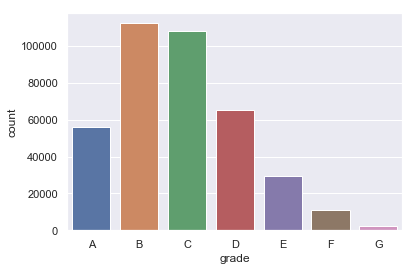

In [43]:
sns.countplot(x = "grade", data = year12to14, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])


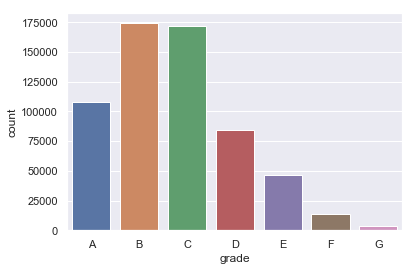

In [47]:
sns.countplot(x = "grade", data = year15to17, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
